In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Codebasics/[redo] Banglore Real Estate Price Prediction Linear Regression+GridSearchCV/bengaluru_house_prices.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


# Basic Cleaning

## Dealing with 'size' column, converting into numeric
 
 here we see there's vals like BHK, 4 Bedroom etc
 
 we gotta understand that BHK & Bedroom are the same thing
 
 so we can just remove all chars other than NUMBERS from size column so that we could get size as numeric

In [6]:
df['size'].unique() # here we'll see those values

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [7]:
# this will remove all chars that aren't numbers from each cell

df['size in BHK'] = df['size'].str.extract('(\d+)', expand=False) # making a new column

df['size in BHK'] = df['size in BHK'].astype(float)
df['size in BHK']

0        2.0
1        4.0
2        3.0
3        3.0
4        2.0
        ... 
13315    5.0
13316    4.0
13317    2.0
13318    4.0
13319    1.0
Name: size in BHK, Length: 13320, dtype: float64

## Dealing with 'total_sqft' column

We tried to convert this column into numeric but theres some non-numeric vals that are preventing that from happening

lets see those vals

In [8]:
for i in df.index:
    if df['total_sqft'].loc[i].isnumeric() == False: # if a val is not numeric, then print/show it
        print(i ,df['total_sqft'].loc[i])

30 2100 - 2850
44 1330.74
56 3010 - 3410
81 2957 - 3450
122 3067 - 8156
137 1042 - 1105
142 1563.05
165 1145 - 1340
188 1015 - 1540
224 1520 - 1740
373 2023.71
393 1113.27
410 34.46Sq. Meter
448 1752.12
549 1195 - 1440
579 1200 - 2400
648 4125Perch
661 1120 - 1145
669 4400 - 6640
672 3090 - 5002
702 4400 - 6800
772 1160 - 1195
775 1000Sq. Meter
801 4000 - 5249
850 1115 - 1130
872 1100Sq. Yards
886 520 - 645
927 1000 - 1285
941 3606 - 5091
959 650 - 665
990 633 - 666
999 2112.95
1019 5.31Acres
1086 30Acres
1178 1445 - 1455
1183 884 - 1116
1187 850 - 1093
1267 1440 - 1884
1282 1558.67
1330 3467.86
1400 716Sq. Meter
1484 547.34 - 827.31
1499 804.1
1542 580 - 650
1614 3425 - 3435
1638 1269.72
1643 1804 - 2273
1683 3630 - 3800
1686 660 - 670
1694 4000 - 5249
1712 1500Sq. Meter
1724 620 - 933
1743 142.61Sq. Meter
1765 2695 - 2940
1775 2000 - 5634
1821 1574Sq. Yards
1852 3450 - 3472
1925 2479.13
1976 2172.65
2036 581.91
2088 1250 - 1305
2128 670 - 980
2228 1005.03 - 1252.49
2265 3630 - 3800
2

here we see these type of vals

1] range vals, eg - 2100 - 2850

2] vals in df units like Sq. Meter, Perch etc

Lets deal with df unit vals

lets see what kind of df units we have

In [15]:
temp = df['total_sqft'].str.contains('[a-zA-Z]') # gives TRUE when theres alphabets in cells in 'total sqft', otherwise false
temp

0        False
1        False
2        False
3        False
4        False
         ...  
13315    False
13316    False
13317    False
13318    False
13319    False
Name: total_sqft, Length: 13320, dtype: bool

In [16]:
units_indices = temp[temp == True].index.tolist() # getting the indices of vals where above = TRUE, ie where there are alphabets in 'total sqft'

In [17]:
units = [] 

for i in units_indices:
    units.append(df['total_sqft'].loc[i]) # to make a list of the vals whose indices above
    
units    

['34.46Sq. Meter',
 '4125Perch',
 '1000Sq. Meter',
 '1100Sq. Yards',
 '5.31Acres',
 '30Acres',
 '716Sq. Meter',
 '1500Sq. Meter',
 '142.61Sq. Meter',
 '1574Sq. Yards',
 '361.33Sq. Yards',
 '117Sq. Yards',
 '3040Sq. Meter',
 '500Sq. Yards',
 '167Sq. Meter',
 '315Sq. Yards',
 '3Cents',
 '188.89Sq. Yards',
 '204Sq. Meter',
 '45Sq. Yards',
 '133.3Sq. Yards',
 '78.03Sq. Meter',
 '122Sq. Yards',
 '84.53Sq. Meter',
 '2.09Acres',
 '24Guntha',
 '697Sq. Meter',
 '142.61Sq. Meter',
 '1500Cents',
 '132Sq. Yards',
 '2Acres',
 '1100Sq. Meter',
 '15Acres',
 '1.26Acres',
 '151.11Sq. Yards',
 '1Grounds',
 '2940Sq. Yards',
 '45.06Sq. Meter',
 '1.25Acres',
 '86.72Sq. Meter',
 '38Guntha',
 '6Acres',
 '120Sq. Yards',
 '24Sq. Meter',
 '142.84Sq. Meter',
 '300Sq. Yards']

these are the vals with df units, these units are

Sq. Meter,Perch, Sq. Yards, Acres, Grounds, Cents, Guntha

In [19]:
# df_units = ['Sq. Meter','Perch', 'Sq. Yards', 'Acres', 'Grounds', 'Cents', 'Guntha']

we can try to use this list to convert these vals in standard SQFT vals

below code deals with ranged vals AND df units vals

1st dealing with ranged vals

In [20]:
df['area_new'] = df['total_sqft'] # 1st we'll make a copy of 'total_sqft' column, then we'll modify this below

for i in df.index:
    
    if '-' in df['total_sqft'].loc[i]: # if its a ranged val
        
        a = df['total_sqft'].loc[i].split('-' , 1) 
                #this will split it into 2 vals -> min val & max val, & store those in a list 'a'. Eg '2100-2850' -> ['2100' , '2850'].
                # where a[0] = 2100 = min val & a[1] = 2850 = max val
                
        df['area_new'].loc[i] = (float(a[0]) + float(a[1]))/2 # finding avg area = (min + max area)/2
                

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


now to handle vals of d/f units

In [21]:

for i in df.index:
    # 1st deal with perch vals
    if 'perch' in df['total_sqft'].loc[i].lower(): # if its in perch units         
        a = df['total_sqft'].loc[i].replace('Perch' , '') # removing 'Perch' substring so that it can be converted to sqft        
        df['area_new'].loc[i] = float(a)*272.25 # converting that number to float & converting that perch to sqft -> ie perch*272.25
    
    # doing the same , but for Sq.Meter
    if 'meter' in df['total_sqft'].loc[i].lower():  
        a = df['total_sqft'].loc[i].replace('Sq. Meter','')  
        df['area_new'].loc[i] = float(a)*10.7639
        
    # for 'Sq. Yards'
    if 'yards' in df['total_sqft'].loc[i].lower():  
        a = df['total_sqft'].loc[i].replace('Sq. Yards','')  
        df['area_new'].loc[i] = float(a)*9
        
    # for 'Acres'
    if 'acres' in df['total_sqft'].loc[i].lower():  
        a = df['total_sqft'].loc[i].replace('Acres','')  
        df['area_new'].loc[i] = float(a)*43560
        
    # for 'Grounds'
    if 'grounds' in df['total_sqft'].loc[i].lower():  
        a = df['total_sqft'].loc[i].replace('Grounds','')  
        df['area_new'].loc[i] = float(a)*2400.35202372 
        
    # for 'Cents'
    if 'cent' in df['total_sqft'].loc[i].lower():  
        a = df['total_sqft'].loc[i].replace('Cents','')  
        df['area_new'].loc[i] = float(a)*435.56
        
    # for 'Guntha'
    if 'guntha' in df['total_sqft'].loc[i].lower():  
        a = df['total_sqft'].loc[i].replace('Guntha','')  
        df['area_new'].loc[i] = float(a)*1089 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [22]:
df['area_new'] = df['area_new'].astype(float)

## Creating column 'price/sqft'

In [23]:
df['price_per_sqft'] = df['price']*100000 / df['area_new']
df['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

## Dealing with the location column

if we find the no of unique vals in location, we'll find that

In [24]:
# but 1st, lets just remove whitespaces from left & right in this column so that it wont give us trouble later

df['location'] = df['location'].str.strip()

# now lets count no of unique vals in 'location'
len(df['location'].unique())

1295

there's 1295 unique vals in this columns,

this can create curse of dimensionality [refer notes] when we do one-hot-encoding on it

so what we'll find the count/frequency of all unique vals

then we'll see which vals have low count , here we'll see vals whose freq < 10

then we'll replace those vals with 'other'

In [25]:
# creating freq table
freq = df.groupby(['location'])['location'].agg(frequency='count')
# in descending order
freq = freq.sort_values(by='frequency', ascending=False)
#providin indices 
freq = freq.reset_index()
freq

,location,frequency
0,Whitefield,541
1,Sarjapur Road,399
2,Electronic City,304
3,Kanakpura Road,273
4,Thanisandra,237
...,...,...
1289,1 Giri Nagar,1
1290,"Kanakapura Road,",1
1291,Kanakapura main Road,1
1292,Karnataka Shabarimala,1


now we'll find the location vals whose freq < 10

you can try to use barplot or pie chart to find thich freq val to select 

In [26]:
temp = freq[freq['frequency'] < 10]
temp

,location,frequency
254,Volagerekallahalli,9
255,B Narayanapura,9
256,Chandra Layout,9
257,Chennammana Kere,9
258,Kaverappa Layout,9
...,...,...
1289,1 Giri Nagar,1
1290,"Kanakapura Road,",1
1291,Kanakapura main Road,1
1292,Karnataka Shabarimala,1


you can see theres 1040 such locations, lets put them in a general category 'other'

In [27]:
#1st create a list of those locations
less_than_10 = temp['location'].tolist()

In [28]:
# now do the thing 

df['location_new'] = df['location'] 

for i in df.index:
    if df['location'].loc[i] in less_than_10:
        df['location_new'].loc[i] = 'other'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [29]:
# now lets see how many unique locations are there

len(df['location_new'].unique())

256

see how we reduced 1295 unique locations to 256, this will avoid curse of dimensonality when we do one-hot-encoding in this column

## Dealing with null vals

In [30]:
# finding no of null vals in ach column

# df.isnull().sum()

# Outlier removal

## Technique 1 - refer temp outlier removal.ipynb

## Technique 2 - By using mean & st deviation

assuming this is a normal distribution (based on concept of normal distribution)

here we'll find mean & std, define a range (mean-std , mean+std)

whichever value doesn't fall in this range is outlier

Here we'll find mean,std of price_per_sqft each location

then we'll filter out the outlier for each location

In [31]:
location_list = df['location_new'].unique().tolist()

In [32]:
outlier_indices = [] # to store indices of all outliers
for location in location_list:
  temp = df[df['location_new'] == location] # filter out data for each location
  mean = temp['price_per_sqft'].mean() # find mean price_per_sqft on that filtered data
  std = temp['price_per_sqft'].std() # same for std
  
  lower_bound = mean - std
  upper_bound = mean + std

  for i in df.index:
    if df['location_new'].loc[i] == location: # for all entries with above location
       if df['price_per_sqft'].loc[i] < lower_bound or df['price_per_sqft'].loc[i] > upper_bound: # if its NOT in the range [< lower bound  or > upper bound]
         outlier_indices.append(i) # store that index val in this list




In [33]:
# now to remove those indices, & store in new dataframe
df1 = df.drop(outlier_indices)


## Technique 3 - Analyse & visualise the data

visualise the anomalies in the data

here we'll make a graph of price vs area_new for each size

1st we take 2 & 3 bhk size for a specific location since they're in majority entries

In [34]:
def tempfunct(location):
  temp = df1[df1['location_new'] == location]
  bhk_2 = temp[temp['size in BHK'] == 2]
  bhk_3 = temp[temp['size in BHK'] == 3]

  plt.rcParams['figure.figsize'] = (20,10)
  plt.scatter(bhk_2.area_new,bhk_2.price,color='blue',label='2 BHK', s=50)
  plt.scatter(bhk_3.area_new,bhk_3.price,color='red',label='3 BHK', s=50)

  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price (Lakh Indian Rupees)")
  plt.title(location)
  plt.legend()

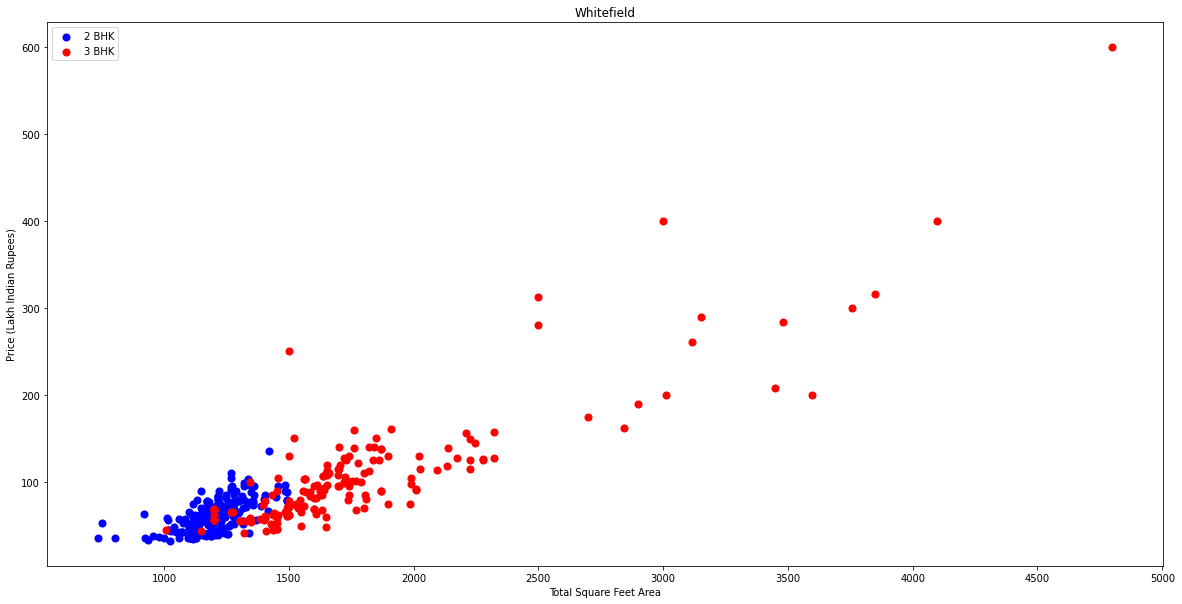

In [35]:
tempfunct('Whitefield')


You can see that some 3bhk properties had lesser area than 2bhk ones FOR Similar PRICE, which is quite unusual.

So we'll remove those 3bhk vals whose area < avg 2 bhk area

we'll do this for all bhks & for each location

eg remove 4bhk entries whose area < avg 3bhk.......& so on

# Model Building

Here we'll build a ML model

We'll use k-fold cross validation for selecting best ML algo in this case

We'll also use Gridsearch-CV to find the best parameter value for that algorithm

1st we'll remove some unnecessary columns
area type , availability , society -> useless cols

location , size , total_sqft -> we've made new modified columsn out of tgese ones

price_per_sqft -> we're removing this because this is MULTICOLINEAR TO PRICE & SQFT as price_per_sqft = price/sqft [previous]

In [39]:
df2 = df.drop([ 'area_type' , 'availability' , 'location' , 'size' , 'society' , 'total_sqft' , 'price_per_sqft'] , axis=1)

df2

,bath,balcony,price,size in BHK,area_new,location_new
0,2.0,1.0,39.07,2.0,1056.0,Electronic City Phase II
1,5.0,3.0,120.00,4.0,2600.0,Chikka Tirupathi
2,2.0,3.0,62.00,3.0,1440.0,Uttarahalli
3,3.0,1.0,95.00,3.0,1521.0,Lingadheeranahalli
4,2.0,1.0,51.00,2.0,1200.0,Kothanur
...,...,...,...,...,...,...
13315,4.0,0.0,231.00,5.0,3453.0,Whitefield
13316,5.0,NaN,400.00,4.0,3600.0,other
13317,2.0,1.0,60.00,2.0,1141.0,Raja Rajeshwari Nagar
13318,4.0,1.0,488.00,4.0,4689.0,Padmanabhanagar


## OneHotEncoding on location_new column

to convert text vals to numerical, so ML algo can read those vals

In [40]:
pd.get_dummies(df['location_new'])

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


you can see it created 255 new columns = no of unique vals in location_new.

In [41]:
# joining these dummies in main df2
dummies = pd.get_dummies(df['location_new'])

df3 = pd.concat([df2 , dummies] , axis='columns')
df3

,bath,balcony,price,size in BHK,area_new,location_new,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2.0,1.0,39.07,2.0,1056.0,Electronic City Phase II,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,3.0,120.00,4.0,2600.0,Chikka Tirupathi,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3.0,62.00,3.0,1440.0,Uttarahalli,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1.0,95.00,3.0,1521.0,Lingadheeranahalli,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1.0,51.00,2.0,1200.0,Kothanur,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,4.0,0.0,231.00,5.0,3453.0,Whitefield,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13316,5.0,NaN,400.00,4.0,3600.0,other,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13317,2.0,1.0,60.00,2.0,1141.0,Raja Rajeshwari Nagar,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,4.0,1.0,488.00,4.0,4689.0,Padmanabhanagar,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# lets also remove column 'other'  
# also location_new' as its being encoded so no need for this

df4 = df3.drop(['other' , 'location_new'] , axis=1)
df4

,bath,balcony,price,size in BHK,area_new,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2.0,1.0,39.07,2.0,1056.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,3.0,120.00,4.0,2600.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3.0,62.00,3.0,1440.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1.0,95.00,3.0,1521.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1.0,51.00,2.0,1200.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,4.0,0.0,231.00,5.0,3453.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13316,5.0,NaN,400.00,4.0,3600.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,2.0,1.0,60.00,2.0,1141.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,4.0,1.0,488.00,4.0,4689.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Dealing with null values

Right now we'll just remove rows with any null vals,

but you can come up with certain logic or relation b/w 2 columns to calculate it

or just use simple imputer

In [43]:
df5 = df4.dropna(axis = 0 , how = 'any')
df5

,bath,balcony,price,size in BHK,area_new,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2.0,1.0,39.07,2.0,1056.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,3.0,120.00,4.0,2600.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3.0,62.00,3.0,1440.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1.0,95.00,3.0,1521.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1.0,51.00,2.0,1200.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13314,3.0,3.0,112.00,3.0,1715.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13315,4.0,0.0,231.00,5.0,3453.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13317,2.0,1.0,60.00,2.0,1141.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,4.0,1.0,488.00,4.0,4689.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Now the final Model training

Step 1 - Define input & output columns ie features x & target y

In [44]:
# 1st define input columns -> x , drop 'price since its an output column
x = df5.drop('price' , axis = 1)

In [45]:
# now define output column -> y = price column
y = df5['price']

Step 2- Train-Test Split

here we'll split the data in 0.2 ratio, ie 20% data is testing rest 80% is training data

In [46]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 10)

## trying out linear regression

In [47]:
# trying out linear regression model, & finding its R^2 score [refer notes krish naik]

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
trained_model = lr.fit(x_train , y_train)
train_score = trained_model.score(x_train , y_train)
test_score = trained_model.score(x_test , y_test)

train_score , test_score

(0.345523482613471, 0.32748721590691376)

well this performs poorly , only 33% accuracy on test data & 34 on train data

Since its perfroming poorly , means that its an underfitted model

In [48]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) 

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.34732997, 0.31746667, 0.2901962 , 0.26088744, 0.31351951])

see that the performance is bad on k-fold cross val score

lets try other models - like

NOW what we're gonna do is - we write a code that trains & test all models that we wanna check & shows the hyperparameter value that gives the best result for each model

We'll use Gridsearch CV for this

GridsearchCV is usually used to find best parameter values for a specific ml model by testing all possible parameter vals,

here we'll use it to test multiple models

## Trying out multiple models & Finding the best model & parameters using Gridsearchcv

1st we create a dictionary which contains all models to try & their respective all possible parameter vals

here we'll try Linear regression , Lasso regression & Descision Tree Regressor

In [49]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    
    # this dictionary contains all models & their respective parameter vals to try
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = [] # stores best scores of each models

    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params']) # show all models with their respective best score & best parameters in form a dataframe



In [50]:
find_best_model_using_gridsearchcv(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

,model,best_score,best_params
0,linear_regression,0.305880,{'normalize': False}
1,lasso,0.206205,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.341711,"{'criterion': 'mse', 'splitter': 'random'}"


So you can see linear regression gives the best possible result , the problem is that it's still low [34%]

So we'll choose linear regression & try to further improve on it

## CREATING A FUNCTION OF ABOVE PIPELINE

we'll put the whole code/pipeline above in a function so that we can rerun the code again & again & check how much the performance/accuracy has improved whenever we want

In [63]:
def machine_learning_pipeline(initial_dataframe): # this is the entire above ml code, to rerun the code again & check how much the model has improved

  df2 = initial_dataframe.drop([ 'area_type' , 'availability' , 'location' , 'size' , 'society' , 'total_sqft' , 'price_per_sqft'] , axis=1)

  pd.get_dummies(initial_dataframe['location_new'])

  # joining these dummies in main df2
  dummies = pd.get_dummies(initial_dataframe['location_new'])

  df3 = pd.concat([df2 , dummies] , axis='columns')

  # lets also remove column 'other'  
  # also location_new' as its being encoded so no need for this

  df4 = df3.drop(['other' , 'location_new'] , axis=1)


  df5 = df4.dropna(axis = 0 , how = 'any')

  # 1st define input columns -> x , drop 'price since its an output column
  x = df5.drop('price' , axis = 1)
  # now define output column -> y = price column
  y = df5['price']

  from sklearn.model_selection import train_test_split
  x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 10)

  # trying out linear regression model, & finding its R^2 score [refer notes krish naik]

  from sklearn.linear_model import LinearRegression
  lr = LinearRegression()
  trained_model = lr.fit(x_train , y_train)
  train_score = trained_model.score(x_train , y_train)
  test_score = trained_model.score(x_test , y_test)

  

  from sklearn.model_selection import ShuffleSplit
  from sklearn.model_selection import cross_val_score

  cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) 

  cross_val_score(LinearRegression(), x, y, cv=cv)

  from sklearn.model_selection import GridSearchCV

  from sklearn.linear_model import Lasso
  from sklearn.tree import DecisionTreeRegressor

  def find_best_model_using_gridsearchcv(x,y):
      
      # this dictionary contains all models & their respective parameter vals to try
      algos = {
          'linear_regression' : {
              'model': LinearRegression(),
              'params': {
                  'normalize': [True, False]
              }
          },
          'lasso': {
              'model': Lasso(),
              'params': {
                  'alpha': [1,2],
                  'selection': ['random', 'cyclic']
              }
          },
          'decision_tree': {
              'model': DecisionTreeRegressor(),
              'params': {
                  'criterion' : ['mse','friedman_mse'],
                  'splitter': ['best','random']
              }
          }
      }
      scores = [] # stores best scores of each models

      cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
      for algo_name, config in algos.items():
          gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
          gs.fit(x,y)
          scores.append({
              'model': algo_name,
              'best_score': gs.best_score_,
              'best_params': gs.best_params_
          })

      return pd.DataFrame(scores,columns=['model','best_score','best_params']) # this dataframe shows all models with their respective best score & best parameters



  return(find_best_model_using_gridsearchcv(x,y) )

## Creating a function that finds R2 vals on training & testing data, to checking overfitting & underfitting

this code is taken from above pipeline as well, line 4 to line 16

In [76]:
def calculate_training_testing_R2_score(initial_dataset):
  df2 = initial_dataset.drop([ 'area_type' , 'availability' , 'location' , 'size' , 'society' , 'total_sqft' , 'price_per_sqft'] , axis=1)

  pd.get_dummies(initial_dataset['location_new'])

  # joining these dummies in main df2
  dummies = pd.get_dummies(initial_dataset['location_new'])

  df3 = pd.concat([df2 , dummies] , axis='columns')

  # lets also remove column 'other'  
  # also location_new' as its being encoded so no need for this

  df4 = df3.drop(['other' , 'location_new'] , axis=1)


  df5 = df4.dropna(axis = 0 , how = 'any')

  # 1st define input columns -> x , drop 'price since its an output column
  x = df5.drop('price' , axis = 1)
  # now define output column -> y = price column
  y = df5['price']

  from sklearn.model_selection import train_test_split
  x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 10)

  # trying out linear regression model, & finding its R^2 score [refer notes krish naik]

  from sklearn.linear_model import LinearRegression
  lr = LinearRegression()
  trained_model = lr.fit(x_train , y_train)
  train_score = trained_model.score(x_train , y_train)
  test_score = trained_model.score(x_test , y_test)

  return(train_score , test_score)

## lets also draw graphs to see how much our model has deviated from actual vals & why this happend

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Text(0.5, 1.0, 'actual price[dots] & predicted price[line] for same area')

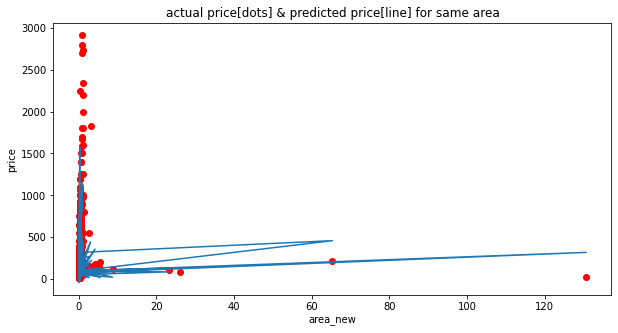

In [77]:
predictions = lr.predict(x_train.values) # predicted price vals
plt.rcParams['figure.figsize'] = (10,5) 


# comparing actual price & predicted price for same area
# here we'll use training dataset ie x_train & y_train

# actual price vals vs area_new, scatterplot red
plt.scatter(x_train['area_new']/10000, y_train , c='red') # y_train = actual price vals
 
# predicted price vals vs area_new , linegraph blue
plt.plot(x_train['area_new']/10000, predictions)

plt.xlabel("area_new")
plt.ylabel("price")
plt.title('actual price[dots] & predicted price[line] for same area')


Text(0.5, 1.0, 'actual price[dots] & predicted price[line] for same size in BHK')

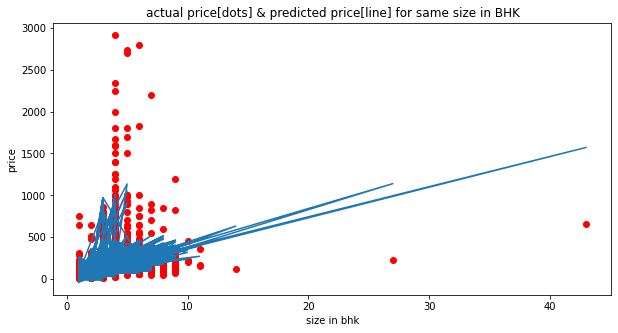

In [78]:



plt.rcParams['figure.figsize'] = (10,5)
# comparing actual price & predicted price for same size_in_bhk 
# here we'll use training dataset ie x_train & y_train

# actual price vals vs area_new, scatterplot red
plt.scatter(x_train['size in BHK'], y_train , c='red') # y_train = actual price vals
 
# predicted price vals vs area_new , linegraph blue
plt.plot(x_train['size in BHK'], predictions)

plt.xlabel('size in bhk')
plt.ylabel("price")
plt.title('actual price[dots] & predicted price[line] for same size in BHK')


again you can see some outliers disturbed our linear model

## Outlier removal & improvment of model

lets make graph of price vs area for different sizes

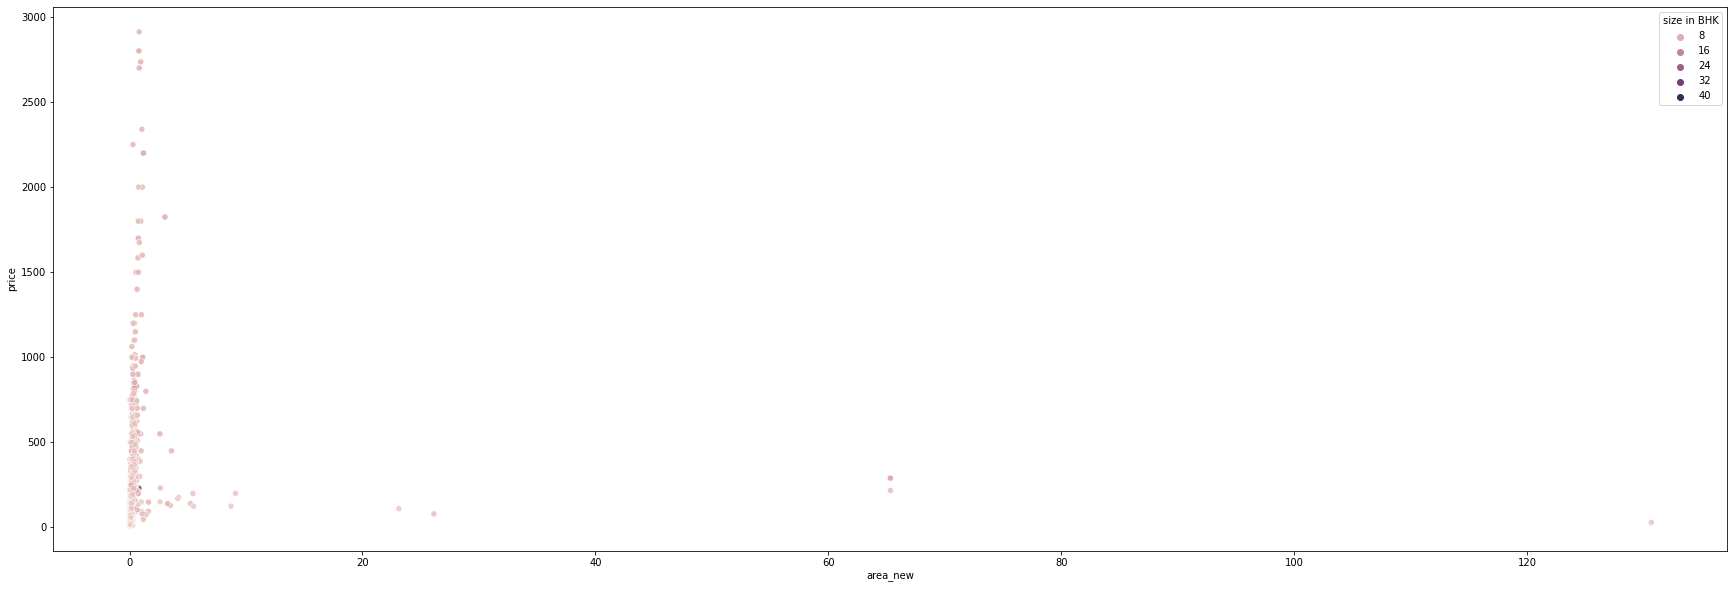

In [79]:
plt.rcParams['figure.figsize'] = (30,10)
sns.scatterplot(x=df5['area_new']/10000, y=df5['price'], hue=df5['size in BHK'])

you can see that there are a few vals very far from general cluster, lets removed them

In [80]:
# remove area_new that are outside mean+-std
mean = df['area_new'].mean()
std = df['area_new'].std()

lower_bound = mean-std
upper_bound = mean+std

df10 = df[(df['area_new'] > lower_bound) & (df['area_new'] < upper_bound)]
df10

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,size in BHK,area_new,price_per_sqft,location_new
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2.0,1056.0,3699.810606,Electronic City Phase II
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4.0,2600.0,4615.384615,Chikka Tirupathi
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3.0,1440.0,4305.555556,Uttarahalli
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3.0,1521.0,6245.890861,Lingadheeranahalli
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2.0,1200.0,4250.000000,Kothanur
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,5.0,3453.0,6689.834926,Whitefield
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00,4.0,3600.0,11111.111111,other
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00,2.0,1141.0,5258.545136,Raja Rajeshwari Nagar
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00,4.0,4689.0,10407.336319,Padmanabhanagar


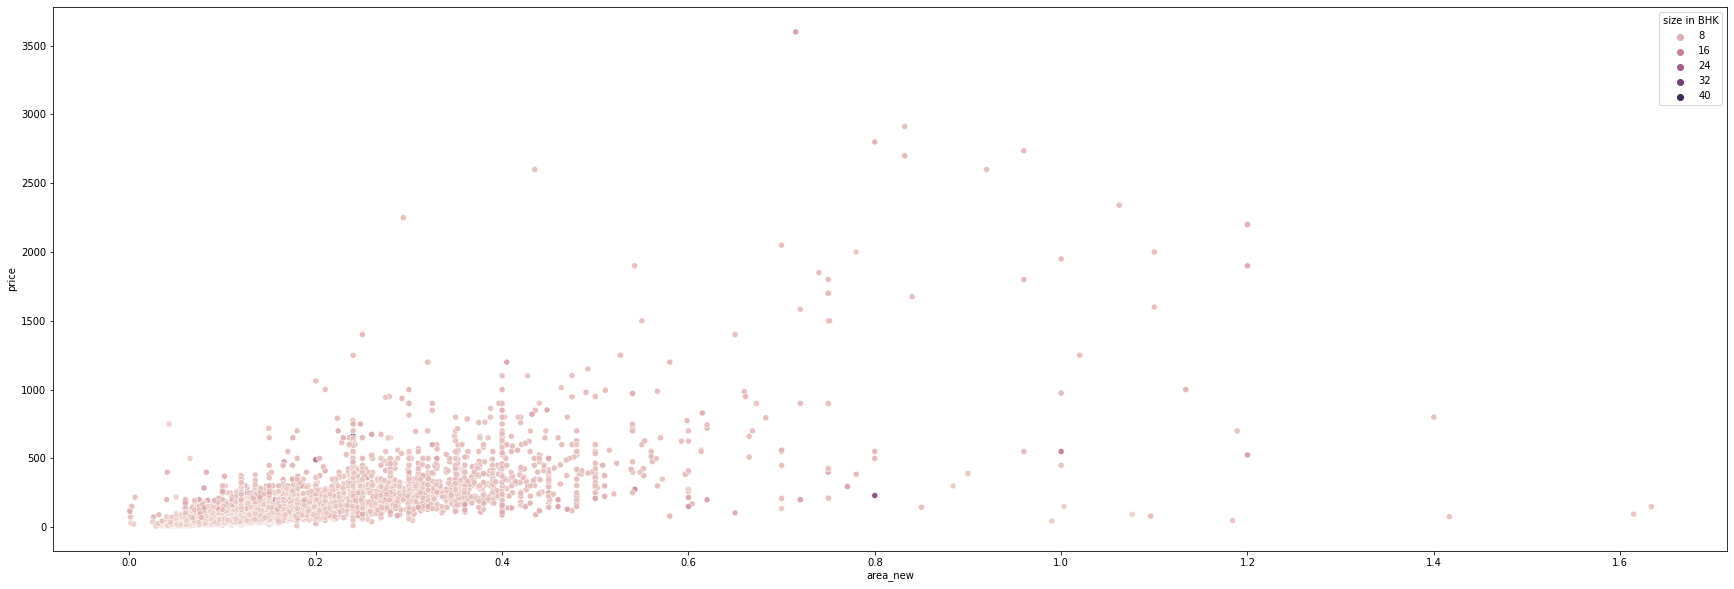

In [81]:
plt.rcParams['figure.figsize'] = (30,10)
sns.scatterplot(x=df10['area_new']/10000, y=df10['price'], hue=df10['size in BHK'])

you can see those extreme vals are gone

now lets remove price_per_sqft outlier by each location & size

kinda like we did in outlier removal.ipynb, just consider size as well

In [82]:
location_list = df10['location_new'].unique().tolist()

In [83]:
outlier_indices = [] # to store indices of all outliers

for location in location_list:
  df_loc = df10[df10['location_new'] == location] # filter out original data for each location

  sizes = df_loc['size in BHK'].unique().tolist() # stores all sizes in that location

  for size in sizes: # for each size in that location

    df_loc_size = df_loc[df_loc['size in BHK'] == size] # further filter location data for each size, 

    mean = df_loc_size['price_per_sqft'].mean() # finds mean of each size of that location
    std = df_loc_size['price_per_sqft'].std() # finds std for same

    lower_bound = mean-std
    upper_bound = mean+std

    for i in df10.index:
      if (df10['location_new'].loc[i] == location) and (df10['size in BHK'].loc[i] == size): # for each size & location
        
        if (df10['price_per_sqft'].loc[i] < lower_bound) or (df10['price_per_sqft'].loc[i] > upper_bound): # if its an outlier

          outlier_indices.append(i) # store its index in this list
    

  

  

In [84]:
df11 = df10.drop(outlier_indices)


In [85]:
len(outlier_indices)

2784

total of 3018 outliers were removed

## Now we rerun the above ML pipeline to see how much our model has improved

In [86]:
# executing the pipeline on new dataset & CHECKING THE MODEL ACCURACY AFTER OUTLIER REMOVAL
machine_learning_pipeline(df11) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

,model,best_score,best_params
0,linear_regression,0.642106,{'normalize': True}
1,lasso,0.562052,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.515877,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [87]:
calculate_training_testing_R2_score(df11)

(0.6887084465294766, 0.6302102038018033)